In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pyxdf

In [2]:
WPI_xdf_path_1 = "../HCILab1-Group7.xdf"
WPI_xdf_path_2 = "../HCILab2-Group7.xdf"
CSL_xdf_path = "../CSL_LabPC_1511.xdf"

### View XDF Streams

In [3]:
def view_xdf_streams(xdf_path):
    data, header = pyxdf.load_xdf(xdf_path)
    print(header)

    for stream in data:
        stream_name = stream["info"]["name"][0]
        stream_id = stream["info"]["stream_id"]
        stream_srate = stream["info"]["effective_srate"]
        
        print(f'Stream {stream_name} (Stream ID: {stream_id} with sampling rate {stream_srate})')

In [4]:
view_xdf_streams(WPI_xdf_path_1)

{'info': defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2024-11-15T09:41:34-0500']})}
Stream Unicorn_HCILab1 (Stream ID: 2 with sampling rate 249.9504906329366)
Stream OBS_HCILab1 (Stream ID: 1 with sampling rate 30.00000028180885)


In [5]:
view_xdf_streams(WPI_xdf_path_2)

Stream 2: Calculated effective sampling rate 25.5533 Hz is different from specified rate 30.0000 Hz.
Stream 3: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.


{'info': defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2024-11-15T09:40:52-0500']})}
Stream OBS_HCILab2 (Stream ID: 2 with sampling rate 25.5532957559289)
Stream Unicorn_HCILab2 (Stream ID: 1 with sampling rate 237.73315494945106)
Stream Unicorn_CSL_LabPC (Stream ID: 3 with sampling rate 0)


In [6]:
view_xdf_streams(CSL_xdf_path)

Stream 1: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.


{'info': defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2024-11-15T15:39:24+0100']})}
Stream OBS_CSL_LabPC (Stream ID: 4 with sampling rate 60.00000238496794)
Stream Unicorn_CSL_LabPC (Stream ID: 1 with sampling rate 0)
Stream Unicorn_CSL_Laptop (Stream ID: 3 with sampling rate 250.21451681596116)
Stream OBS_CSL_Laptop (Stream ID: 2 with sampling rate 29.999737840457225)


WPI HCI Lab Streams:
Stream Unicorn_HCILab1 has 807802 time stamps, starting with 202437.0131336937


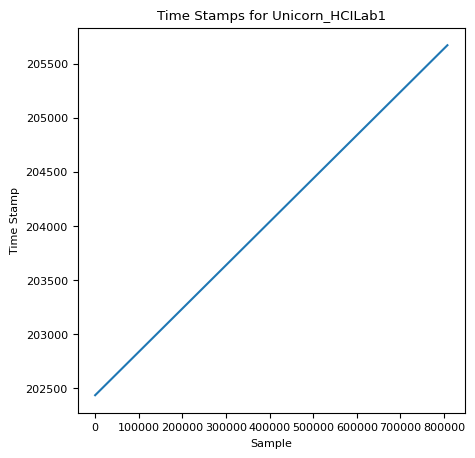

Stream OBS_HCILab1 has 96991 time stamps, starting with 202435.41804048294
Stream OBS_HCILab1 with time series (UNIX) begins with 1731681694.693


Stream 2: Calculated effective sampling rate 25.5533 Hz is different from specified rate 30.0000 Hz.
Stream 3: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.


Stream OBS_HCILab2 has 81645 time stamps, starting with 121770.58476703658
Stream OBS_HCILab2 with time series (UNIX) begins with 1731681652.913
Stream Unicorn_HCILab2 has 763718 time stamps, starting with 121753.60700837035


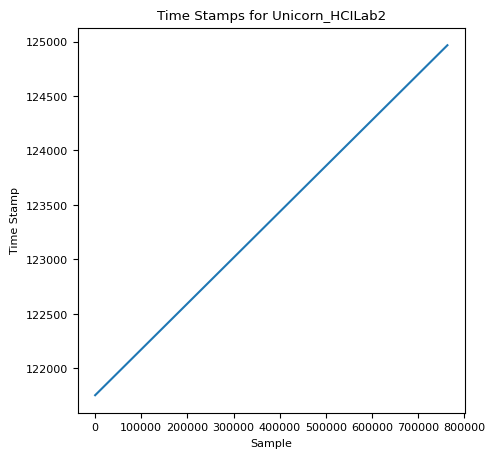

Stream Unicorn_CSL_LabPC has no time stamps


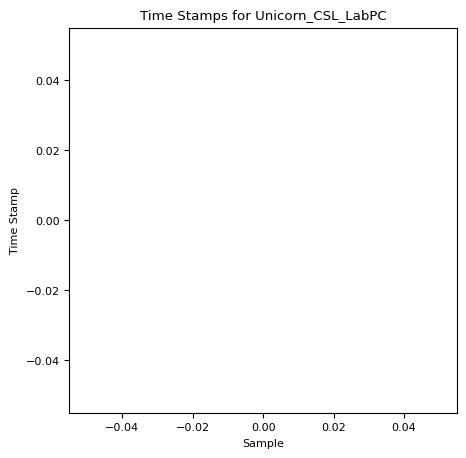


CSL Lab Streams:


Stream 1: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.


Stream OBS_CSL_LabPC has 196231 time stamps, starting with 1570256.9885151233
Stream OBS_CSL_LabPC with time series (UNIX) begins with 1731681564.075
Stream Unicorn_CSL_LabPC has no time stamps


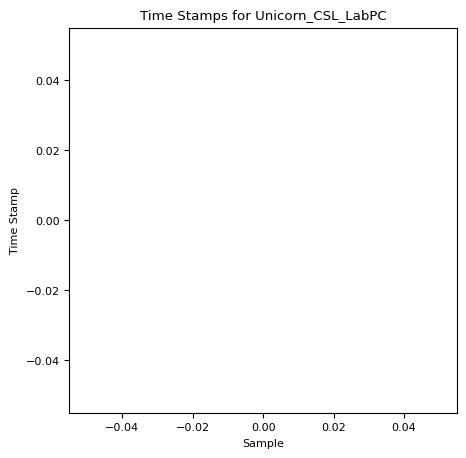

Stream Unicorn_CSL_Laptop has 818370 time stamps, starting with 1570256.7397488991


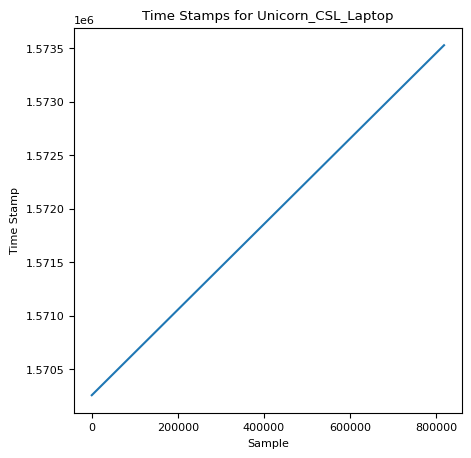

Stream OBS_CSL_Laptop has 98115 time stamps, starting with 1570257.0064192226
Stream OBS_CSL_Laptop with time series (UNIX) begins with 1731681564.081


In [7]:
def examine_timestamps_length(xdf_path):
    data, header = pyxdf.load_xdf(xdf_path)
    
    for stream in data:
        stream_name = stream["info"]["name"][0]
        
        time_stamps = stream["time_stamps"]
        
        if len(time_stamps) > 0:
            print(f'Stream {stream_name} has {len(time_stamps)} time stamps, starting with {time_stamps[0]}')
        else:
            print(f'Stream {stream_name} has no time stamps')
        
        time_series = stream["time_series"]
        if stream_name.startswith("OBS"):
            print(f"Stream {stream_name} with time series (UNIX) begins with {time_series[0][0]}")
        
        if "Unicorn" in stream_name:
            # plot the time stamps
            plt.rc('font', size=8)
            plt.figure(figsize=(5, 5))
            plt.plot(time_stamps)
            plt.xlabel('Sample')
            plt.ylabel('Time Stamp')
            plt.title(f"Time Stamps for {stream_name}")
            plt.show()

# Examine the length of all time stamps in each stream for both XDF files
print("WPI HCI Lab Streams:")
examine_timestamps_length(WPI_xdf_path_1)
examine_timestamps_length(WPI_xdf_path_2)

print("\nCSL Lab Streams:")
examine_timestamps_length(CSL_xdf_path)

### Sync Streams!!

In [8]:
def sync_streams(data_streams_1, data_streams_2, data_streams_3):
    
    """
    Sync the data by trimming time_stamp and time_series streams so that all EEG and Unicorn Streams begin at the same time
    
    Parameters:
    - data_streams_1: Stream data from WPI HCI Lab 1 xdf file
    - data_streams_2: Stream data from WPI HCI Lab 2 xdf file
    - data_streams_3: Stream data from CSL Lab xdf file
    """
    
    # Holds the 8 streams (4 OBS and 4 Unicorn)
    streams = {}
    
    # Create mappings of the 8 stream names to streams
    for stream in data_streams_1 + data_streams_2:
        stream_name = stream["info"]["name"][0]
        
        if stream_name in ["OBS_HCILab1", "Unicorn_HCILab1", "OBS_HCILab2", "Unicorn_HCILab2"]:
            streams[stream_name] = stream
            
    for stream in data_streams_3:
        stream_name = stream["info"]["name"][0]
        
        if stream_name in ["OBS_CSL_Laptop", "Unicorn_CSL_Laptop", "OBS_CSL_LabPC", "Unicorn_CSL_LabPC"]:
            streams[stream_name] = stream
    
    # From the OBS Video (when Chris says "Begin" and "Time's Up")
    start_unix_timestamp = 1731681845.109
    end_unix_timestamp = 1731684777.020
    duration = end_unix_timestamp - start_unix_timestamp
    frames = 250 * duration
    
    # Trim all the other streams based on the latest Unix timestamp
    for OBS_stream_name, EEG_stream_name in [("OBS_HCILab1", "Unicorn_HCILab1"), ("OBS_HCILab2", "Unicorn_HCILab2"), ("OBS_CSL_Laptop", "Unicorn_CSL_Laptop")]:
        OBS_stream = streams[OBS_stream_name]
        EEG_stream = streams[EEG_stream_name]
        
        # First, find the LabRecorder timestamp in the OBS stream that corresponds to the start and end Unix timestamp
        OBS_unix_times = [ts[0] for ts in OBS_stream["time_series"]]
        start_OBS_index = np.searchsorted(OBS_unix_times, start_unix_timestamp)
        end_OBS_index = np.searchsorted(OBS_unix_times, end_unix_timestamp)
        
        start_labrecorder_timestamp = OBS_stream["time_stamps"][start_OBS_index]
        
        # Find the index in the EEG stream where this LabRecorder timestamp occurs
        start_EEG_index = np.searchsorted(EEG_stream["time_stamps"], start_labrecorder_timestamp)
        end_EEG_index = start_EEG_index + round(frames)
        
        # Trim all the data in the OBS and EEG streams based on this index
        OBS_stream["time_stamps"] = OBS_stream["time_stamps"][start_OBS_index:end_OBS_index]
        OBS_stream["time_series"] = OBS_stream["time_series"][start_OBS_index:end_OBS_index]
        EEG_stream["time_stamps"] = EEG_stream["time_stamps"][start_EEG_index:end_EEG_index]
        EEG_stream["time_series"] = EEG_stream["time_series"][start_EEG_index:end_EEG_index]
        
        print("For EEG Stream " + EEG_stream_name + ", start cutoff index is " + str(start_EEG_index) + " and end cutoff index is " + str(start_EEG_index + len(EEG_stream["time_stamps"])))
    
    return streams

In [9]:
# Load the XDF data for both labs
WPI_data_streams_1, WPI_header_1 = pyxdf.load_xdf(WPI_xdf_path_1)
WPI_data_streams_2, WPI_header_2 = pyxdf.load_xdf(WPI_xdf_path_2)
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)

Stream 2: Calculated effective sampling rate 25.5533 Hz is different from specified rate 30.0000 Hz.
Stream 3: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.
Stream 1: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.


In [10]:
# Before syncing the streams, let's examine the time_stamps and time_series in both files
def print_time_stamps_and_series(data_streams):
    for stream in data_streams:
        stream_name = stream["info"]["name"][0]
        print(f'\nStream {stream_name} has {len(stream["time_stamps"])} time stamps and {len(stream["time_series"])} time series')
        
        if len(stream["time_stamps"]) > 0:
            print(f'Time stamps: [{stream["time_stamps"][0]} ... {stream["time_stamps"][-1]}]')
        
        if stream_name.startswith("OBS") and len(stream["time_series"]) > 0:
            print(f'Time series (UNIX): [{stream["time_series"][0][0]} ... {stream["time_series"][-1][0]}]')
        
print("WPI HCI Lab Streams before syncing:")
print_time_stamps_and_series(WPI_data_streams_1)
print_time_stamps_and_series(WPI_data_streams_2)

print("\nCSL Lab Streams before syncing:")
print_time_stamps_and_series(CSL_data_streams)

WPI HCI Lab Streams before syncing:

Stream Unicorn_HCILab1 has 807802 time stamps and 807802 time series
Time stamps: [202437.0131336937 ... 205668.85716069475]

Stream OBS_HCILab1 has 96991 time stamps and 96991 time series
Time stamps: [202435.41804048294 ... 205668.41801011303]
Time series (UNIX): [1731681694.693 ... 1731684927.733]

Stream OBS_HCILab2 has 81645 time stamps and 81645 time series
Time stamps: [121770.58476703658 ... 124965.63831329123]
Time series (UNIX): [1731681652.913 ... 1731684827.288]

Stream Unicorn_HCILab2 has 763718 time stamps and 763718 time series
Time stamps: [121753.60700837035 ... 124966.10401674837]

Stream Unicorn_CSL_LabPC has 0 time stamps and 17 time series

CSL Lab Streams before syncing:

Stream OBS_CSL_LabPC has 196231 time stamps and 196231 time series
Time stamps: [1570256.9885151233 ... 1573527.488385122]
Time series (UNIX): [1731681564.075 ... 1731684834.57]

Stream Unicorn_CSL_LabPC has 0 time stamps and 17 time series

Stream Unicorn_CSL

In [11]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams_1, WPI_data_streams_2, CSL_data_streams)

For EEG Stream Unicorn_HCILab1, start cutoff index is 37203 and end cutoff index is 770181
For EEG Stream Unicorn_HCILab2, start cutoff index is 52573 and end cutoff index is 763718
For EEG Stream Unicorn_CSL_Laptop, start cutoff index is 70386 and end cutoff index is 803364


In [12]:
print("WPI HCI Lab Streams AFTER syncing:")
print_time_stamps_and_series(WPI_data_streams_1)
print_time_stamps_and_series(WPI_data_streams_2)

print("\nCSL Lab Streams AFTER syncing:")
print_time_stamps_and_series(CSL_data_streams)

WPI HCI Lab Streams AFTER syncing:

Stream Unicorn_HCILab1 has 732978 time stamps and 732978 time series
Time stamps: [202585.8546099193 ... 205518.3433532845]

Stream OBS_HCILab1 has 87956 time stamps and 87956 time series
Time stamps: [202585.85137240315 ... 205517.68467819563]
Time series (UNIX): [1731681845.13 ... 1731684776.999]

Stream OBS_HCILab2 has 75071 time stamps and 75071 time series
Time stamps: [121974.74666932959 ... 124912.53352099458]
Time series (UNIX): [1731681845.122 ... 1731684777.006]

Stream Unicorn_HCILab2 has 711145 time stamps and 711145 time series
Time stamps: [121974.74992547375 ... 124966.10401674837]

Stream Unicorn_CSL_LabPC has 0 time stamps and 17 time series

CSL Lab Streams AFTER syncing:

Stream OBS_CSL_LabPC has 196231 time stamps and 196231 time series
Time stamps: [1570256.9885151233 ... 1573527.488385122]
Time series (UNIX): [1731681564.075 ... 1731684834.57]

Stream Unicorn_CSL_LabPC has 0 time stamps and 17 time series

Stream Unicorn_CSL_Lap

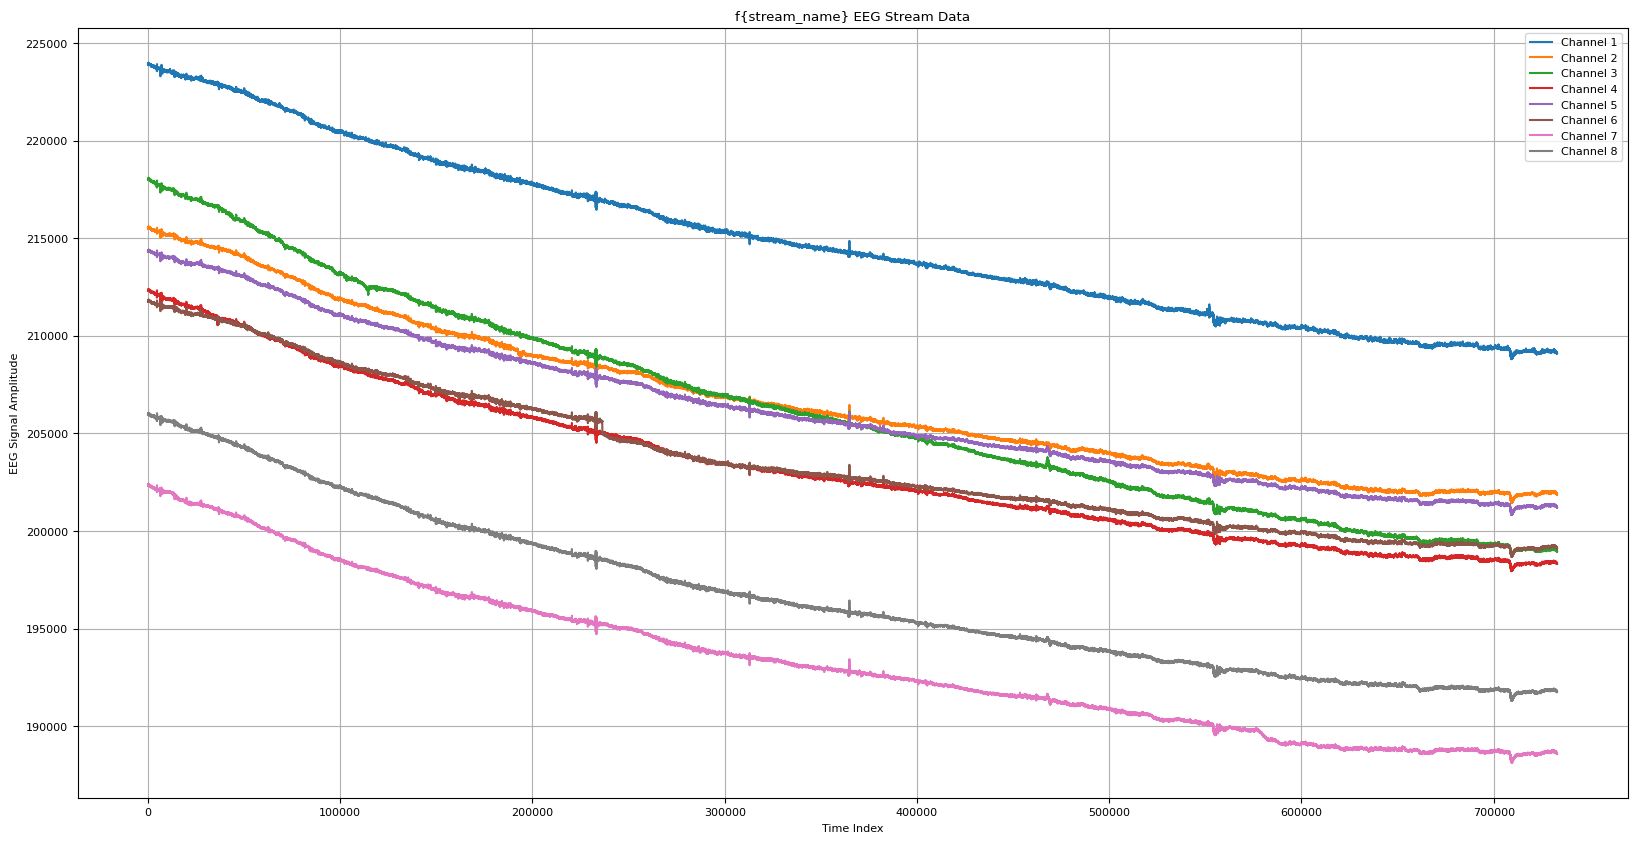

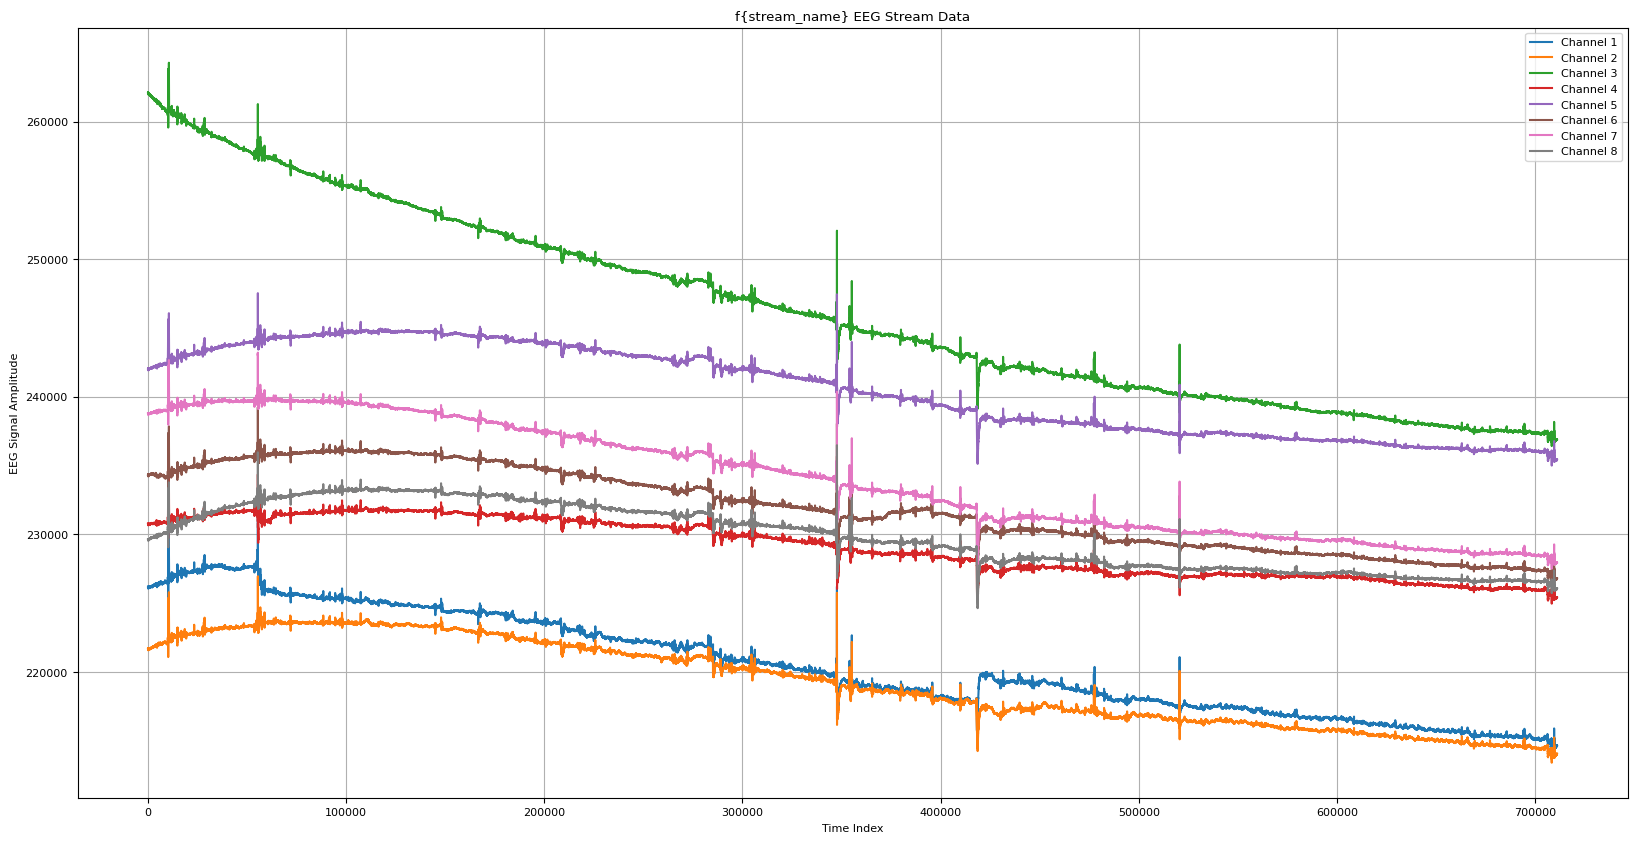

/Users/henryhuang/3rd Year/research/brain-hci/EEG-sync/virtual_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


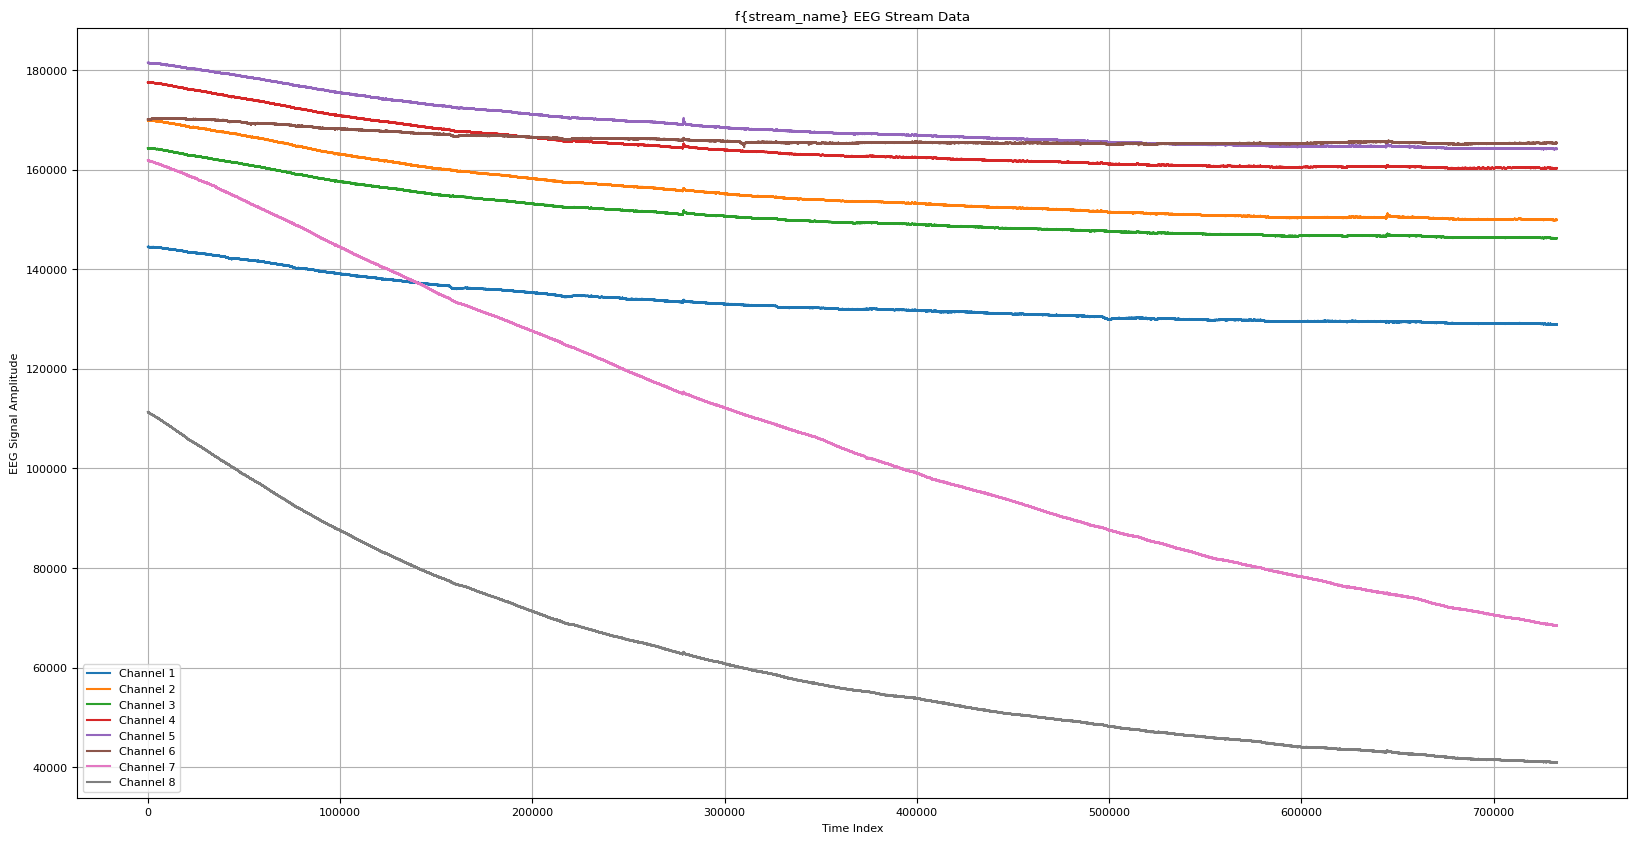

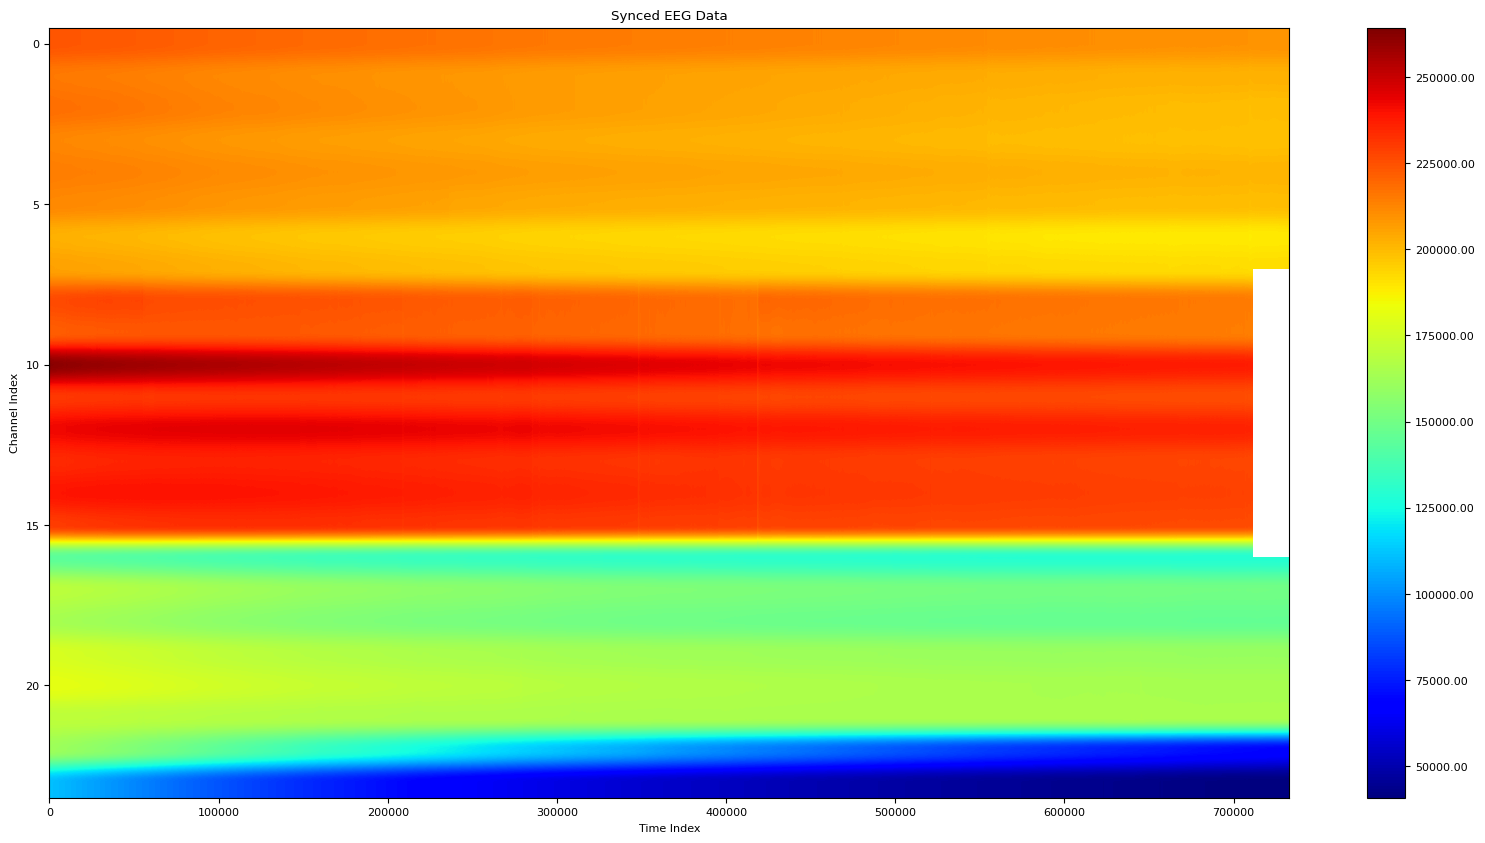

Min: 40891.53125
Max: 264283.53125
Mean: 190923.11884988865
Standard Deviation: 44923.0495454076


In [13]:
import scipy.io

# Disable scientific notation in NumPy globally
np.set_printoptions(suppress=True)

# find the max length of time_series in all EEG streams to establish dimensions for synced EEG streams
max_length = 0

for stream_name in ["Unicorn_HCILab1", "Unicorn_HCILab2", "Unicorn_CSL_Laptop"]:
    max_length = max(max_length, len(streams[stream_name]["time_series"]))

# Create an np array to hold the synced EEG data with dimensions (max_length, 3 * 8)
synced_EEG_data = np.full((max_length, 3 * 8), np.nan)

# Fill in the synced EEG data
for j, stream_name in enumerate(["Unicorn_HCILab1", "Unicorn_HCILab2", "Unicorn_CSL_Laptop"]):
    EEG_stream = streams[stream_name]
    
    eeg_stream_data = np.full((len(EEG_stream["time_series"]), 8), np.nan)
    for time_index, eeg_data in enumerate(EEG_stream["time_series"]):
        synced_EEG_data[time_index, j * 8:(j + 1) * 8] = eeg_data[0:8]
        eeg_stream_data[time_index, :] = eeg_data[0:8]
    
    # Visualize the EEG stream data
    time_indices = range(eeg_stream_data.shape[0])
    
    plt.figure(figsize=(20, 10))
    
    # Plot each channel as a separate line
    for channel_idx in range(eeg_stream_data.shape[1]):
        plt.plot(time_indices, eeg_stream_data[:, channel_idx], label=f'Channel {channel_idx+1}')

    plt.title("f{stream_name} EEG Stream Data")
    plt.xlabel("Time Index")
    plt.ylabel("EEG Signal Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Download the EEG data as an .mat file
    scipy.io.savemat(f'{stream_name}.mat', {f'{stream_name}': eeg_stream_data})

# Visualize the synced EEG data
plt.figure(figsize=(20, 10))
plt.imshow(synced_EEG_data.T, aspect='auto', cmap='jet')
plt.colorbar(format='%.2f')  # Ensures color bar does not use scientific notation
plt.title("Synced EEG Data")
plt.xlabel("Time Index")
plt.ylabel("Channel Index")
plt.show()

print("Min:", np.nanmin(synced_EEG_data))
print("Max:", np.nanmax(synced_EEG_data))
print("Mean:", np.nanmean(synced_EEG_data))
print("Standard Deviation:", np.nanstd(synced_EEG_data))

# Download the EEG data as an .mat file
scipy.io.savemat('task_cutoff_EEG_data_7.mat', {'task_cutoff_EEG_data_7': synced_EEG_data})